 # MATH F314 Projet n°2: Equation d'écoulement dans un milieux poreux
 ### Broissin Jérémy, Houyoux Guillaume
 
 ## I.Introduction
 
Dans ce second projet, nous allons déterminer la vitesse d'écoulement incompressible d'un milieu poreux. Cette vitesse suit l'équation (ou loi) de Darcy: $$\overrightarrow{u}= \frac{-K}{\mu}\bigg(\overrightarrow{\nabla}{P} - \rho \overrightarrow{g}\bigg)$$
 Où $\overrightarrow{g}$ est dirigé selon l'axe z, K et $\mu$ sont des constantes, respectivement pour la perméabilité et la viscosité du milieu. 
 De plus, si un soluté est présent, la vitesse $\overrightarrow{u}$ suit l'équation d'advection-diffusion: $$\Phi\frac{\partial C}{\partial t}= -\overrightarrow{u}\overrightarrow{\nabla}{C} + \Phi D \overrightarrow{\nabla}^2{C}$$
 Avec cela, et après quelques manipulations, on arrive au système d'équations suivant:
 $$\bigg(\frac{\partial ^2}{\partial z^2} - k^2\bigg)w(z,t) = -k^2c(z,t)$$
 $$\frac{\partial c(z,t)}{\partial t} -\frac{1}{R_a}\bigg(\frac{\partial ^2}{\partial z^2} - k^2\bigg)c(z,t) = -\frac{\partial C_0}{\partial z}w(z,t)$$
 Avec $\frac{\partial C_0}{\partial z} = -\frac{2}{\sqrt{\pi}}\sqrt{\frac{R_a}{4 t}}e^{-\big(z\sqrt{\frac{R_a}{4 t}}\big)^2} $
 
Le but étant de résoudre ce sytème d'équation de manière purement théorique et analytique dans un premier temps, puis de manière numérique. 
 
 ## II.Résolution analytique
 
 **• Résolution de la question n°1:** 
 
 Posons la variable $\xi= z\sqrt{\frac{R_a}{4t}}$, il nous faut maintenant réécrire le système d'équations ci-dessus en terme des variables $\xi$ et $t$. 
 
 Calculons d'abord $\frac{\partial f(z,t)}{\partial z}$ puis $\frac{\partial ^2 f(z,t)}{\partial z^2}$: 
 $$\frac{\partial f(z,t)}{\partial z}= \frac{\partial f(\xi,t)}{\partial \xi} \frac{\partial \xi}{\partial z} = \sqrt{\frac{R_a}{4t}} \frac{\partial f(\xi,t)}{\partial \xi}$$
 $$\frac{\partial ^2 f(z,t)}{\partial z^2} = \frac{R_a}{4t} \frac{\partial ^2 f(\xi,t)}{\partial \xi ^2}$$
 
 Notre première équation devient alors:
 $$\bigg(\frac{R_a}{4t}\frac{\partial ^2}{\partial \xi ^2} -k^2\bigg)w(\xi,t) = -k^2 c(\xi,t) (1)$$
 
 Il reste encore à calculer $\frac{\partial f(z,t)}{\partial t}$ :
 $$\frac{\partial f(z,t)}{\partial t} = \frac{\partial f(\xi,t)}{\partial \xi}\frac{\partial \xi}{\partial t} + \frac{\partial f(\xi,t)}{\partial t} = \sqrt{\frac{R_a}{4t}} \frac{\partial f(\xi,t)}{\partial \xi} + \frac{\partial f(\xi,t)}{\partial t} $$
 
 La seconde équation s'écrit alors:
 $$\frac{\partial c(\xi,t)}{\partial t} -\frac{1}{t} \bigg(\frac{1}{4}\frac{\partial ^2}{\partial \xi ^2} - \frac{\xi}{2}\frac{\partial}{\partial \xi} - \frac{k^2 t}{R_a}\bigg) c(\xi,t) = \sqrt{\frac{R_a}{\pi t}}e^{-\xi ^2}w(\xi,t) (2)$$
 
 *Résumé:*
 On a réexprimé notre système d'équations initial en terme des nouvelles variables. On utilisera le nouveau système, déféni par (1) et (2), pour résoudre de manière analytique et numérique le problème. 
 
 **• Résolution de la question n°2:**
 
 Pour créer les opérateurs, nous utiliserons le lien suivant :https://en.wikipedia.org/wiki/Finite_difference_coefficient?fbclid=IwAR3ZIxsqk_B6J76bNSUibbln4wJ4ygC6oty4cNNWHE7oxa6VKwIhzbTRLfc
 
 Afin de trouver $M_{ij}$ et $L_{ij}$, nous allons d'abord calculer les matrices correspondants à $\frac{\partial}{\partial \xi}$ et à $\frac{\partial ^2}{\partial \xi ^2}$.
 
 Si on discrétise $\xi$ comme $\xi_m = m\Delta$ avec $m = 0, 1, ... , 100$, on peut alors approximer grâce à un développement de Taylor les dérivées premières et secondes agissant sur une fonction discrétisée $u_m(\xi_m,t)$.
 
 Regardons d'abord pour $\frac{\partial ^2}{\partial \xi ^2}$. Si on développe $\frac{\partial ^2}{\partial \xi ^2}u_{i}$ avec Taylor, on a: $$\frac{\partial ^2}{\partial \xi ^2}u_{i} =\frac{1}{\Delta ^2}\big(u_{i-1} - 2u_i + u_{i+1}\big)$$
 Ceci nous donne la matrice de taille $m \times m$ suivante: 
 $$ \frac{1}{\Delta ^2}\begin{pmatrix} 
-2 & 1 & 0 & \cdots & \cdots & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & \cdots & \cdots \\
0 & 1 & -2 & 1 & 0 &\cdots & \cdots \\
\vdots & \ddots & 1 & -2 & 1 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 & 1 & -2 & 1 \\
0 & \cdots & \cdots & \cdots & 0 & 1 & -2
\end{pmatrix}$$

Calculons maintenant le développement de Taylor de $\frac{\partial}{\partial \xi}u_i$, on obtient: $$\frac{\partial}{\partial \xi}u_i = \frac{1}{2\Delta}\bigg(\frac{-1}{2}u_{i-1} + \frac{1}{2}u_{i+1}\bigg)$$
On a donc une nouvelle matrice de taille $m \times m$: 
$$ \frac{1}{2\Delta }\begin{pmatrix} 
0 & \frac{1}{2} & 0 & \cdots & \cdots & \cdots & 0 \\
\frac{-1}{2} & 0 & \frac{1}{2} & 0 & \cdots & \cdots & \cdots \\
0 & \frac{-1}{2} & 0 & \frac{1}{2} & 0 &\cdots & \cdots \\
\vdots & \ddots & \frac{-1}{2} & 0 & \frac{1}{2} & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 & \frac{-1}{2} & 0 & \frac{1}{2} \\
0 & \cdots & \cdots & \cdots & 0 & \frac{-1}{2} & 0
\end{pmatrix}$$

Nous voulons calculer $L_{ij}$ et $M_{ij}$ définis comme: 
$$ L_{ij} =  \frac{R_a}{4t} \bigg(\frac{\partial ^2}{\partial \xi ^2}\bigg)_{ij} -k^2 I_{ij}$$
$$ M_{ij} = \frac{1}{t} \bigg[ \frac{1}{4}\bigg(\frac{\partial ^2}{\partial \xi ^2}\bigg)_{ij} + \frac{i\Delta}{2}\bigg(\frac{\partial}{\partial \xi}\bigg)_{ij} - \frac{k^2 t}{R_a}I_{ij}\bigg]$$

Ecrivons explicitement ces matrices: 
$$L = \frac{R_a}{4t\Delta ^2}\begin{pmatrix} 
-2 & 1 & 0 & \cdots & \cdots & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & \cdots & \cdots \\
0 & 1 & -2 & 1 & 0 &\cdots & \cdots \\
\vdots & \ddots & 1 & -2 & 1 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 & 1 & -2 & 1 \\
0 & \cdots & \cdots & \cdots & 0 & 1 & -2
\end{pmatrix} - k^2\begin{pmatrix}
1 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & 1 & 0 & \cdots & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & 1 \\
\end{pmatrix}$$
$$ M = \frac{1}{4t \Delta^2}\begin{pmatrix} 
-2 & 1 & 0 & \cdots & \cdots & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & \cdots & \cdots \\
0 & 1 & -2 & 1 & 0 &\cdots & \cdots \\
\vdots & \ddots & 1 & -2 & 1 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 & 1 & -2 & 1 \\
0 & \cdots & \cdots & \cdots & 0 & 1 & -2
\end{pmatrix} + \frac{1}{4t}\begin{pmatrix} 
0 & \frac{1}{2} & 0 & \cdots & \cdots & \cdots & 0 \\
\frac{-2}{2} & 0 & \frac{2}{2} & 0 & \cdots & \cdots & \cdots \\
0 & \frac{-3}{2} & 0 & \frac{3}{2} & 0 &\cdots & \cdots \\
\vdots & \ddots & \frac{-4}{2} & 0 & \frac{4}{2} & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 & \frac{-99}{2} & 0 & \frac{99}{2} \\
0 & \cdots & \cdots & \cdots & 0 & \frac{-100}{2} & 0
\end{pmatrix} - \frac{k^2 }{R_a}\begin{pmatrix}
1 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & 1 & 0 & \cdots & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & 1 \\
\end{pmatrix}$$

*Remarque:* on peut réécrire $M$ en fonction de $L$ comme suit: 
$$ R_a M_{ij} = L_{ij} + \frac{iR_a}{4t}\bigg(\frac{\partial}{\partial \xi}\bigg)_{ij}$$

**Résolution de la question n°3:**

On cherche à savoir si la fonction $f(\xi)$ définie par: $$ f(\xi)= e^{-\xi ^2}h(\xi)$$ est fonction propre de l'opérateur $H$ défini par: 
$$H= \frac{1}{4}\frac{\partial ^2}{\partial \xi ^2} + \frac{\xi}{2}\frac{\partial}{\partial \xi}$$  
Où $h(\xi)$ est la solution à l'équation d'Hermite donnée par: $h''(\xi) - 2\xi h'(\xi) = -2\lambda h(\xi)$

Regardons l'action de $H$ sur $f$: 

$\begin{split}
Hf(\xi) & =  \frac{1}{4}\frac{\partial^2{f}}{\partial{\xi^2}} + \frac{\xi}{2}\frac{\partial{f}}{\partial{\xi}} \\
& = \frac{1}{4}\frac{\partial^2\big({e^{-\xi^2}}h(\xi)\big)}{\partial{\xi^2}} + \frac{\xi}{2}\frac{\partial{\big(e^{-\xi^2}}h(\xi)\big)}{\partial\xi}= \frac{1}{4}\frac{\partial{\big(-2\xi e^{-\xi^2}h(\xi) + e^{-\xi^2}h'(\xi)\big)}}{\partial{\xi}} + \frac{\xi}{2}\big(-2\xi e^{-\xi^2}h(\xi)+e^{-\xi^2}h'(\xi)\big) \\
& = \frac{1}{4}\bigg[(-2e^{-\xi^2} + 4\xi^2e^{-\xi^2})h(\xi)-2\xi e^{-\xi^2}h'(\xi) - 2\xi e^{-\xi^2}h'(\xi) + e^{-\xi^2}h''(\xi)] + \frac{\xi}{2}[-2\xi e^{-\xi^2}h(\xi) + e^{-\xi^2}h'(\xi)\bigg] \\
& = e^{-\xi^2}\bigg[-\frac{1}{2}h(\xi) + \xi^2 h(\xi) - \frac{1}{2}\xi h'(\xi) - \frac{1}{2}\xi h'(\xi) + \frac{1}{4}h''(\xi) - \xi^2 h(\xi) + \frac{1}{2}\xi h'(\xi) \bigg] \\
& = -\frac{1}{2}e^{-\xi^2}\big[h(\xi) + \xi h'(\xi) - \frac{1}{2}h''(\xi)\big]
\end{split}$

Il reste alors à trouver les solutions de l'équation aux valeurs propres suivante: 
$$Hf(\xi) = -\frac{1}{2}e^{-\xi^2}h(\xi)(1+\lambda) = -\frac{1}{2}(1+\lambda)f(\xi)$$  
Donc, $\alpha = -\frac{1}{2}(\lambda+1)$ 

Par la condition initiale $f(\xi=\infty)=0$ , $\lambda$ doit être un entier strictement positif.  
Par la condition initiale $f(\xi=0)=0$, $\lambda$ doit être en plus impair, car seul les polynômes de Hermite d'indice impaire s'annulent en zéro.

Les valeurs propres admissibles sont donc les entiers négatifs non-nuls $\alpha$ 

En prenant les cinq premières valeurs de $\lambda$, on a:

$\begin{align*}
\lambda=1 => \alpha=-1 \\
\lambda=3 => \alpha=-2 \\
\lambda=5 => \alpha=-3 \\
\lambda=7 => \alpha=-4 \\
\lambda=9 => \alpha=-5
\end{align*}$

### Conclusion
On sait maintenant comment devrait se comporter la résolution de manière numérique. Précisons toute fois, qu'il s'agira d'une approximation et non d'une résolution exacte. Si on regarde de manière plus concrète, on a le système d'équations donné par (1) et (2) qui se réécrit comme: 
$$L w(\xi,t) = -k^2 c(\xi,t)$$
$$ \frac{\partial c(\xi, t)}{\partial t} - M c(\xi,t) = \sqrt{\frac{R_a}{\pi t}} e^{- \xi ^2} w(\xi,t)$$
C'est sur cette base que nous allons résoudre de manière numérique le problème.


## III. Résolution Numérique

Durant cette partie, nous allons d'abord vérifier les deux premières questions de manière numérique en approximant les valeurs obtenues pour l'opérateur $H$. Puis nous allons, à l'aide de la méthode RK4, résoudre les équations simplifiées écrites ci-dessus grâce au changement de variable effectué à la question 1. 

**Résolution de la question n°4:**

In [1]:
import numpy as np

On sait que la discrétisation s'effectue sur une grille uniforme: $\xi_m = m\Delta$ avec $m = 0, 1, ... , 100$  
La discrétisation va donc apparaître à chaque ligne, itérée d'une unité. Il nous faut alors implémenter la matrice $\frac{m}{2}\frac{\partial}{\partial{\xi}}$ de cette façon:

In [32]:
def dérivée_première(N):
    matrice = np.zeros((N-2,N-2))
    for i in range(0,N-2):
        if i==0:
            matrice[i][0]=0
            matrice[i][1]=1/2
        elif i==N-3:
            matrice[i][N-3]=0
            matrice[i][N-4]=-1/2*(i+1)
        else:
            matrice[i][i-1]=-1/2*(i+1)
            matrice[i][i+1]=1/2*(i+1)
    return matrice

In [51]:
print(dérivée_première(101))

[[  0.    0.5   0.  ...   0.    0.    0. ]
 [ -1.    0.    1.  ...   0.    0.    0. ]
 [  0.   -1.5   0.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...   0.   48.5   0. ]
 [  0.    0.    0.  ... -49.    0.   49. ]
 [  0.    0.    0.  ...   0.  -49.5   0. ]]


Implémentons maintenant la dérivée seconde de façon classique cette fois-ci:

In [34]:
def dérivée_seconde(N):
    matrice = np.zeros((N-2,N-2))
    for i in range(0,N-2):
        if i==0:
            matrice[i][0]=-2
            matrice[i][1]=1
            matrice[i][2]=0
        elif i==N-3:
            matrice[i][N-3]=-2
            matrice[i][N-4]=1
            matrice[i][N-5]=0
        else:
            matrice[i][i]=-2
            matrice[i][i-1]=1
            matrice[i][i+1]=1
    return matrice

In [52]:
print(dérivée_seconde(101))

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Il est maintenant temps de construire numériquement l'opérateur $H$

In [11]:
# Paramètre delta
l = 5
N = 101
delta = l/(N-1)

In [26]:
H = (1/(4*delta**2))*dérivée_seconde(N)+(1/2*dérivée_première(N))
print("Forme matricielle de l'opérateur H :\n")
print(H)

Forme matricielle de l'opérateur H :

[[-200.    100.25    0.   ...    0.      0.      0.  ]
 [  99.5  -200.    100.5  ...    0.      0.      0.  ]
 [   0.     99.25 -200.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... -200.    124.25    0.  ]
 [   0.      0.      0.   ...   75.5  -200.    124.5 ]
 [   0.      0.      0.   ...    0.     75.25 -200.  ]]


L'objectif étant de calculer les valeurs propres de $H$, nous utiliserons la méthode $linalg.eig$ de la librairie numpy qui prend une matrice carrée comme paramètre et retourne un tuple contenant d'une part les valeurs propres de l'opérateur, et d'autre part la matrice de ses vecteurs propres.

In [25]:
valeurs_propres = np.linalg.eig(H)[0]
print("Les 5 plus grandes valeurs propres de l'opérateur H :\n")
for i in range(5):                          # sorted() trie les valeurs dans l'ordre décroissant mais comme on
    print(sorted(valeurs_propres)[::-1][i]) # sait qu'elles sont négatives, on prendra les dernières de la liste.

Les 5 plus grandes valeurs propres de l'opérateur H :

-1.0000000013658472
-2.00000045898609
-3.0000377699672205
-4.001153174304798
-5.0150158495852395


Elles concordent bien avec les valeurs propres calculées à la question 3 !

 **Résolution de la question n°5:**

Commençons par implémenter les outils et la fonction Rk4 comme utilisée dans le premier projet. 


In [17]:
import math
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

def rk4(f,f_0,h,ini,fin):
    N = math.ceil((fin-ini)/h) 
    y = np.zeros((N,99))
    t = np.zeros((N,1)) #On met une seconde matrice comme l'équation dépend de deux variables
    y[0]= f_0           #Conditions initiales
    t[0]= ini
    
    for n in range(N-1): #Implémentation de l'ordre de rk
        k1 = h * f(y[n],t[n]) 
        k2 = h * f(y[n] + k1/2, t[n] + h/2)
        k3 = h * f(y[n] + k2/2,t[n] + h/2)
        k4 = h * f(y[n] + k3,t[n] + h) #On suit étape par étape la construction de la suite ki définie par la méthode rk
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4)/6
        t[n+1] = t[n] + h  
    return y

Ensuite, réécrivons le système d'équations pour déterminer une équation uniquement en $c(\xi,t)$, on a :
$$ w(\xi,t) = -k^2 L^{-1} c(\xi,t)$$
$$c'(\xi,t) = \bigg(-k^2\sqrt{\frac{R_a}{\pi t}}e^{-\xi ^2}L^{-1} - M \bigg) c(\xi,t)$$
Maintenant, on peut definir la seconde équation de manière numérique et en prenant les conditions données dans la question.

In [27]:
# Conditions
Ra = 500
k = 0.1
c_i = np.load("init_cond_c.npy")

Définition de la fonction $c(\xi,t)$

In [62]:
def f(y,t): 
    L = (Ra/(4*t*(delta**2)))*dérivée_seconde(101) -(k**2) * np.identity(99)
    M = (1/t) * ((1/4)*dérivée_seconde(101) - (1/4)*dérivée_première(101) - ((k**2) * t)/Ra*np.identity(99))
    L_inv = np.linalg.inv(L) # calcule la matrice inverse de l'opérateur L
    return np.dot((-(k**2) * np.sqrt(Ra/(np.pi*t)) * np.dot(np.exp(-(np.linspace(0,l,N)[1:-1])**2),L_inv) - M),y)
data = rk4(f,c_i,10**(-8),10**(-5),10**(-4))
print (data)

[[ 0.32322026  0.57278405  0.40414506 ...  0.3797694  -0.46983868
   0.74341004]
 [ 0.32331024  0.57290878  0.4040288  ...  0.37715913 -0.4658468
   0.74968681]
 [ 0.32340016  0.5730334   0.40391249 ...  0.37453336 -0.46174932
   0.75590945]
 ...
 [ 0.64551671  0.87692589 -0.43419468 ...  4.85409972 -1.40642007
   2.68011407]
 [ 0.64553803  0.87693747 -0.43426266 ...  4.85219549 -1.40934035
   2.68202605]
 [ 0.64555935  0.87694904 -0.43433064 ...  4.85028884 -1.4122558
   2.68394162]]
9000
99


Plotons le résultat

In [66]:
# Set parameters.
Lx = 10  # length of the plate in the x direction
Ly = 10  # length of the plate in the y direction
nx = 99  # number of points in the x direction
ny = 9000 # number of points in the y direction
x = np.linspace(0.0, Lx, num=nx)
y = np.linspace(0.0, Ly, num=ny)

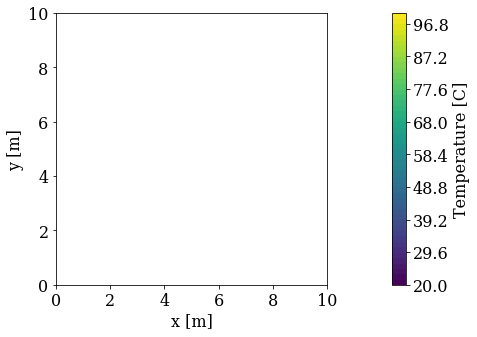

In [67]:
from matplotlib import pyplot
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
# Plot the filled contour of the temperature.
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = np.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, data, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');

Malheureusement avec le MOOC et ce qu'on a cherché sur internet, on a pas su mettre les données sur un graphe. Néanmoins on peut voir que les données numériques concordent parfaitement avec la résolution analytique. De plus, il nous suffit juste de calculer $w(\xi,t)$ pour déterminer la vitesse d'écoulement dans un milieu poreux.